## HW2 Question 2

Your job is to predict democracy index by real GDP per capita and other demographic features.  Inorder to predict the democracy index we are going to use the following models:
1.  Ridge Regression (10 points)
2.  Lasso Regression (10 points)
3.  Adaptive Lasso Regression (10 points)
4.  Elastic Net Regression (10 points)

In [40]:
#Required libraries
import pandas as pd
import asgl
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV
import logging
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt


In [54]:
income_cleansed

,dem_ind,log_gdppc,log_pop,age_1,age_2,age_3,age_4,age_5,educ,age_median
38,0.530000,8.905374,9.933823,0.307737,0.241766,0.210866,0.151395,0.088237,4.988,26.799999
39,0.166667,9.016160,10.011580,0.302024,0.239600,0.207557,0.152852,0.097967,5.214,27.200001
40,0.833333,9.133990,10.084220,0.293686,0.245023,0.199240,0.154751,0.107299,5.876,27.400000
41,0.166667,9.202840,10.167740,0.292191,0.248464,0.190341,0.154945,0.114059,5.845,27.299999
42,0.833333,9.271142,10.243310,0.305165,0.237141,0.186167,0.152458,0.119069,6.618,27.200001
...,...,...,...,...,...,...,...,...,...,...
1364,0.666667,7.831994,8.716208,0.487388,0.249146,0.135395,0.081204,0.046867,2.147,15.600000
1365,0.500000,7.876341,8.872487,0.490522,0.261934,0.124533,0.075827,0.047184,2.816,15.400000
1366,0.166667,7.913739,9.061492,0.477027,0.272603,0.132026,0.073196,0.045149,2.828,16.000000
1367,0.333333,7.977293,9.234155,0.462648,0.277990,0.141861,0.072411,0.045090,4.087,16.700001


In [6]:
#Read in and cleanse the data
income_democracy = pd.read_csv('./data/income_democracy.csv')
exclude_cols = ['country','year','code']
income_cleansed = income_democracy.drop(exclude_cols, axis=1)
for col in income_cleansed.columns:
    income_cleansed = income_cleansed[~pd.isnull(income_cleansed[col])]


In [53]:
income_cleansed.shape

(679, 10)

In [7]:
y = income_cleansed.dem_ind
X = income_cleansed.drop("dem_ind", axis=1)

In [8]:
#Split dataset into train/test with a train size of 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fit ridge regression
### 2A) 

In [21]:
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10],store_cv_values=True, alpha_per_target=True).fit(X_train, y_train)

In [22]:
ridge.alpha_

10.0

In [30]:
y_pred_ridge = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test,y_pred_ridge)
print(ridge_mse)

0.05953832584294149


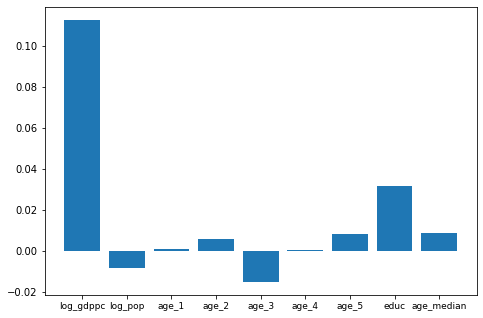

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(X_train.columns),list(ridge.coef_))
#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=9)

## Fit lasso regression
### 2B) 

In [12]:
lasso = LassoCV(cv=10).fit(X_train, y_train)

In [13]:
lasso.alpha_

0.0015182975900542828

In [37]:
y_pred_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test,y_pred_lasso)
print(lasso_mse)

0.059578045325377305


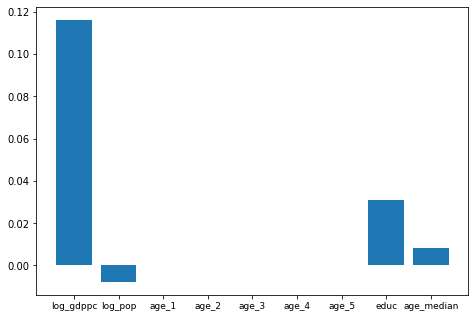

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(X_train.columns),list(lasso.coef_))
#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=9)
plt.show()

## Fit adaptive lasso regression
### 2C) 

In [49]:
#lambda1 = 10.0 ** np.arange(-3, 1.51, 0.1)
tvt_alasso = asgl.TVT(model='lm', penalization='alasso', lambda1=lasso.alpha_, parallel=True,
                      weight_technique='lasso', error_type='MSE', random_state=1, 
                      train_size=80)

#alasso_result = tvt_alasso.train_validate_test(x=X_train, y=y_train)
#alasso_prediction_error = alasso_result['test_error']
#alasso_betas = alasso_result['optimal_betas'][1:]


In [50]:
tvt_alasso.alpha

0.5

In [52]:
tvt_alasso.coef_

## Fit elastic net regression
### 2D) 

In [15]:
elastic = ElasticNetCV(cv=10).fit(X_train, y_train)

In [16]:
elastic.alpha_

0.003036595180108563

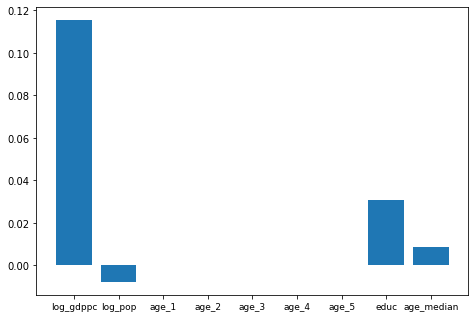

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(X_train.columns),list(elastic.coef_))
#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=9)
plt.show()

In [34]:
y_pred_elastic = lasso.predict(X_test)
elastic_mse = mean_squared_error(y_test,y_pred_elastic)
print(elastic_mse)

0.059578045325377305


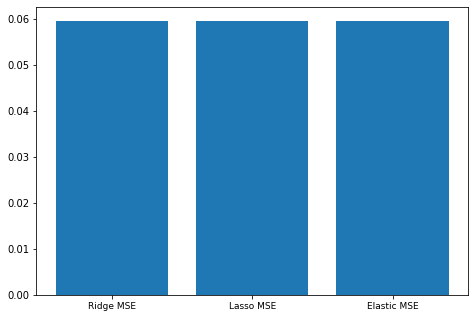

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mse_x = ["Ridge MSE","Lasso MSE","Elastic MSE"]
mse_y=[ridge_mse,lasso_mse,elastic_mse]
ax.bar(mse_x,mse_y)
#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=9)
plt.show()